In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


mu_total = 129.51     
var_total = 13.8947    

data = [
    ("Agave lechuguilla",     0.06237857016, 0.01092496674),
    ("Agave salmiana",        0.29418023450, 0.01508438895),
    ("Agave scabra",          0.06378730770, 0.01056107563),
    ("Agave striata",         0.06019351159, 0.01091126803),
    ("Opuntia cantabrigiensis",0.07732665946,0.01070779767),
    ("Opuntia engelmannii",   0.06321196499, 0.009848872888),
    ("Opuntia robusta",       0.11522526710, 0.01109275802),
    ("Opuntia streptacantha", 0.09551359296, 0.01446836880),
    ("Prosopis laevigata",    0.12871788880, 0.01818201083),
    ("Yucca filifera",        0.03946500276, 0.007618690728),
]
species_df = pd.DataFrame(data, columns=["species","p_mean","p_std"])

sum_p = species_df["p_mean"].sum()
if abs(sum_p - 1.0) > 1e-6:
    species_df["p_mean"] = species_df["p_mean"] / sum_p


In [ ]:

N_binom = mu_total**2 / (mu_total - var_total)
p_binom = mu_total / N_binom

N_binom = int(round(N_binom))
p_binom = mu_total / N_binom

eps = 1e-12
phi_candidates = []
for _, row in species_df.iterrows():
    p = row["p_mean"]
    var_p = max(row["p_std"]**2, eps)
    phi_e = (p*(1.0 - p))/var_p - 1.0
    if phi_e > 0:
        phi_candidates.append(phi_e)

if len(phi_candidates) == 0:
    phi = 500.0  
else:
    phi = float(np.median(phi_candidates))
phi = float(np.clip(phi, 10.0, 1e6))

species_df["alpha"] = phi * species_df["p_mean"]

print(f"Parámetros total/ha: Binomial(N={N_binom}, p={p_binom:.6f})  -> E[N]={N_binom*p_binom:.2f}")
print(f"Concentración Dirichlet: phi≈{phi:.1f}  (sum alpha≈{species_df['alpha'].sum():.1f})")
species_df


Parámetros total/ha: Binomial(N=145, p=0.893172)  -> E[N]=129.51
Concentración Dirichlet: phi≈571.9  (sum alpha≈571.9)


,species,p_mean,p_std,alpha
0,Agave lechuguilla,0.062379,0.010925,35.677172
1,Agave salmiana,0.294180,0.015084,168.255203
2,Agave scabra,0.063787,0.010561,36.482894
3,Agave striata,0.060194,0.010911,34.427437
4,Opuntia cantabrigiensis,0.077327,0.010708,44.226672
5,Opuntia engelmannii,0.063212,0.009849,36.153829
6,Opuntia robusta,0.115225,0.011093,65.902628
7,Opuntia streptacantha,0.095514,0.014468,54.628616
8,Prosopis laevigata,0.128718,0.018182,73.619679
9,Yucca filifera,0.039465,0.007619,22.571850


In [ ]:

rng = np.random.default_rng(seed=42)
B = 100000   

alpha = species_df["alpha"].to_numpy()
p_mean_vec = species_df["p_mean"].to_numpy()
E = len(alpha)


N_samples = rng.binomial(n=N_binom, p=p_binom, size=B)

P_samples = rng.dirichlet(alpha, size=B)   


X_samples = np.zeros((B, E), dtype=int)
for b in range(B):
    n = int(N_samples[b])
    if n > 0:
        X_samples[b, :] = rng.multinomial(n=n, pvals=P_samples[b, :])
    else:
        X_samples[b, :] =  np.zeros(E, dtype=int)


                species  p_input  E[X_e]=mu*p  mean_sim  sd_sim   p5  p50  p95  Pr(>0)
         Agave salmiana    0.294       38.099    38.106   5.815 29.0 38.0 48.0   1.000
     Prosopis laevigata    0.129       16.670    16.667   4.255 10.0 16.0 24.0   1.000
        Opuntia robusta    0.115       14.923    14.914   4.035  9.0 15.0 22.0   1.000
  Opuntia streptacantha    0.096       12.370    12.380   3.720  7.0 12.0 19.0   1.000
Opuntia cantabrigiensis    0.077       10.015     9.997   3.392  5.0 10.0 16.0   1.000
           Agave scabra    0.064        8.261     8.268   3.096  4.0  8.0 14.0   1.000
    Opuntia engelmannii    0.063        8.187     8.191   3.070  4.0  8.0 14.0   1.000
      Agave lechuguilla    0.062        8.079     8.073   3.056  3.0  8.0 13.0   1.000
          Agave striata    0.060        7.796     7.795   2.996  3.0  8.0 13.0   0.999
         Yucca filifera    0.039        5.111     5.114   2.464  2.0  5.0 10.0   0.991


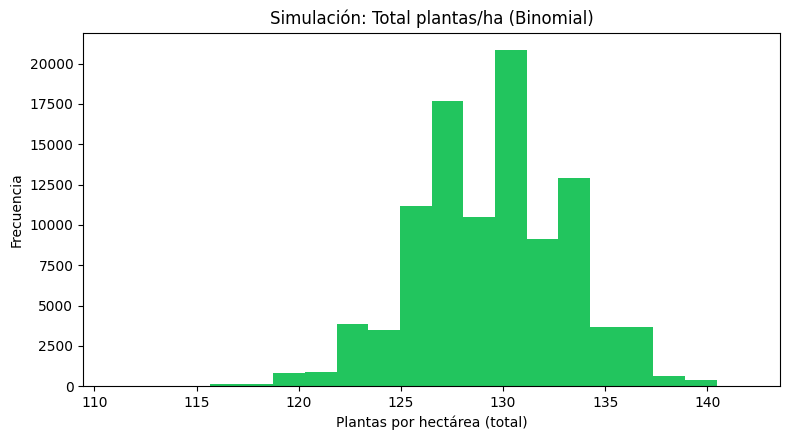

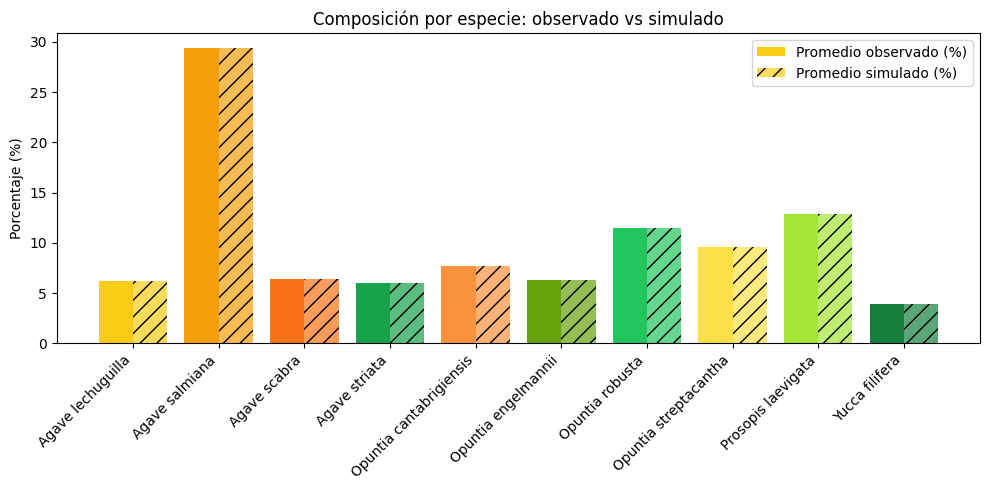

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PALETTE = {
    "AG_SAL": "#F59E0B", # Agave salmiana
    "OP_ROB": "#22C55E", # Opuntia robusta
    "OP_STR": "#FDE047", # Opuntia streptacantha
    "OP_ENG": "#65A30D", # Opuntia engelmannii
    "OP_CAN": "#FB923C", # Opuntia cantabrigiensis
    "PR_LAE": "#A3E635", # Prosopis laevigata
    "AG_LEC": "#FACC15", # Agave lechuguilla
    "AG_STR": "#16A34A", # Agave striata
    "AG_SCB": "#F97316", # Agave scabra
    "YU_FIL": "#15803D"  # Yucca filifera
}


SPECIES_TO_KEY = {
    "Agave salmiana": "AG_SAL",
    "Opuntia robusta": "OP_ROB",
    "Opuntia streptacantha": "OP_STR",
    "Opuntia engelmannii": "OP_ENG",
    "Opuntia cantabrigiensis": "OP_CAN",
    "Prosopis laevigata": "PR_LAE",
    "Agave lechuguilla": "AG_LEC",
    "Agave striata": "AG_STR",
    "Agave scabra": "AG_SCB",
    "Yucca filifera": "YU_FIL"
}

summary = []
for i, row in species_df.iterrows():
    counts = X_samples[:, i]
    mean_c = counts.mean()
    sd_c = counts.std(ddof=1)
    p5, p50, p95 = np.percentile(counts, [5, 50, 95])
    p_occ = (counts > 0).mean()
    summary.append({
        "species": row["species"],
        "p_input": row["p_mean"],
        "E[X_e]=mu*p": mu_total * row["p_mean"],
        "mean_sim": mean_c,
        "sd_sim": sd_c,
        "p5": p5, "p50": p50, "p95": p95,
        "Pr(>0)": p_occ
    })
summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values("mean_sim", ascending=False).reset_index(drop=True)
print(summary_df.round(3).to_string(index=False))


plt.figure(figsize=(8,4.5))
plt.hist(N_samples, bins=20, color=PALETTE["OP_ROB"]) 
plt.xlabel("Plantas por hectárea (total)")
plt.ylabel("Frecuencia")
plt.title("Simulación: Total plantas/ha (Binomial)")
plt.tight_layout()
plt.show()

p_sim_mean = P_samples.mean(axis=0)
labels = species_df["species"].tolist()
p_input_vals = 100 * species_df["p_mean"].to_numpy()
p_sim_vals = 100 * p_sim_mean

x = np.arange(len(labels))
w = 0.4

plt.figure(figsize=(10,5))

for i in range(len(labels)):
    species = labels[i] 
    
    species_key = SPECIES_TO_KEY[species] 
    color = PALETTE[species_key]          

    lab_obs = "Promedio observado (%)" if i == 0 else ""
    lab_sim = "Promedio simulado (%)" if i == 0 else ""

    plt.bar(x[i] - w/2, p_input_vals[i], 
            width=w, 
            label=lab_obs, 
            color=color)
    
    plt.bar(x[i] + w/2, p_sim_vals[i],   
            width=w, 
            label=lab_sim, 
            color=color, 
            alpha=0.7,
            hatch='//')

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("Porcentaje (%)")
plt.title("Composición por especie: observado vs simulado")
plt.legend()
plt.tight_layout()
plt.show()

Agave salmiana: ~29.4% de la mezcla. Esperas 38 plantas/ha en promedio; 90% de las veces caerá entre 29 y 48; aparece siempre (Pr>0=1.000).

Prosopis laevigata: ~12.9%; media 16.7; rango típico 10–24; aparece siempre.

Yucca filifera: ~3.9%; media 5.1; rango 2–10; aparece en ~99% de las hectáreas.